In [88]:
#importing the libraries used for analysis and visualization

import numpy as np                    
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [89]:
#On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
#killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
#One of the reasons that the shipwreck led to such loss of life was that there were not enough
#lifeboats for the passengers and crew.
#Although there was some element of luck involved in surviving the sinking, some groups of people 
#were more likely to survive than others, such as women, children, and the upper-class

In [90]:
titanic=pd.read_csv('titanic.csv')     #getting the csv file.

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
# Cabin, Age and Embarked columns have missing data.

In [94]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
# Mean of Ages is 29.6

In [96]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [97]:
# Name is unique across the entire set.
# Survived has 2 values- 0 or 1
# there were 3 pclass.
# Embarked=3, 3 ports.

In [98]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
# S port used by most passengers.

In [100]:
titanic['Sex'].value_counts()/891

male      0.647587
female    0.352413
Name: Sex, dtype: float64

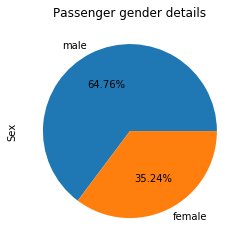

In [101]:
((titanic['Sex'].value_counts())/891).plot(kind='pie',title='Passenger gender details', autopct='%0.2f%%')
plt.show()

In [102]:
# more male passengers. 65% male 

In [103]:
# Ticket has no contribution to the survival rate

### Droping Ticket column

In [104]:
titanic=titanic.drop('Ticket',axis=1)

In [105]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [106]:
# completing the data
# Fill in Age column- can be used to check for survival
# Fill in Embarked column


# cleansing
# sibsp and parch can be dropped and formed a new column family
# extract title from the name

In [107]:
# QUESTIONS-
# which group of gender was more likely survive(female)
# which age group were more likelyto had survived (children of age<() were more likely to survive)
# most dangerous passenger class( pclass=3)

### Creating a new column 'Family'

In [110]:
titanic['Family']=titanic['SibSp']+titanic['Parch']+1

In [113]:
# dropping Sibsp and Parch

In [114]:
titanic=titanic.drop(['SibSp','Parch'],axis=1)

In [133]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [134]:
titanic.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
# female survived is greater than male survived

In [135]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
# Pclass 3 has the lowest survival rate.

### 1. Chances of survival according to gender

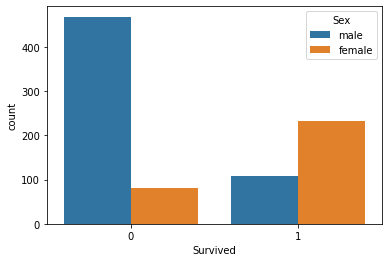

In [141]:
sns.countplot(x='Survived',data=titanic,hue='Sex')

In [142]:
survival=titanic.groupby('Sex').sum()['Survived']
survival

Sex
female    233
male      109
Name: Survived, dtype: int64

In [143]:
total=titanic['Sex'].value_counts()
total


male      577
female    314
Name: Sex, dtype: int64

In [149]:
x=(survival/total)*100
x

female    74.203822
male      18.890815
dtype: float64

Text(0, 0.5, 'Gender')

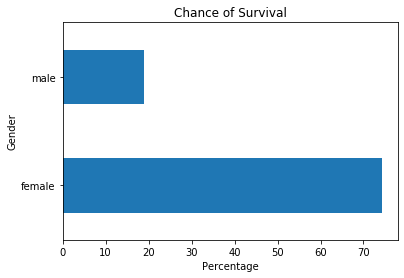

In [151]:
x.plot(kind='barh',title="Chance of Survival")
plt.xlabel('Percentage')
plt.ylabel('Gender')